# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab we will use the titanic dataset to see the impact of tree pruning and hyper parameter tuning on the predictive performance of decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. In this lab, we shall work with the Titanic dataset and see how we can tweak different hyper parameters for optimal pruning of the trees. 

## Objectives
You will be able to:
- Demonstrate how pruning is performed for decision trees 
- Understand and explain the role of different Decision tree hyperparameters
- Select the best values for chosen hyperparameters and monitor the improvemen in performance

## Import necessary libraries

Let's first import the libraries you would need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
plt.style.use('seaborn')



## Read the Titanic Dataset

In the repo, we have made titanic dataset , all cleaned up and pre-processed for you, so that you can focus on pruning and optimization. The features set is available as `featues.csv` and target variable as `target.csv`. 
- Load these files into separate dataframes below.
- Check the shape for consistency and the view the head 

In [2]:
# Load features and target variables

# Your code here 
df= pd.read_csv('features.csv')
df1= pd.read_csv('target.csv')
df
df1.head()

,Survived
0,0
1,1
2,1
3,1
4,0


This is great. Now that we have our x (feat) and y(target), we can go ahead and make a split necessary for supervised learning.

## Create a 70/30 Train/Test split
- Using features and target variables above , create a 70/30 split using 

In [3]:
# Create a 70/30 split for given X and y 

X= df
y= df1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
# Your code here 

So now we have our data ready for training, lets first train a DT classifier with this data
## Train a Vanilla Classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Create a decision tree instance
- Fit a DT classifier with training dataset using all default settings for hyperparameters i.e. we dont change any parameter.
- Set the impurity crietria to "entropy".

In [4]:
# Train the classifier using training data 

clf= DecisionTreeClassifier(criterion='entropy')
model_tree = clf.fit(X_train,y_train)
# Your code here 

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under curve) to check the predictive performance

In [5]:
# Make predictions using test set 

y_hat_test=model_tree.predict(X_test)
y_hat_train= model_tree.predict(X_train)

# Your code here 


# Check the AUC of predictions
roc_auc_score(y_test, y_hat_test)
roc_auc_score(y_train, y_hat_train)

# Your code here 

1.0

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree. 
- Create an array for for depth values ranging from 1 - 32. 
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

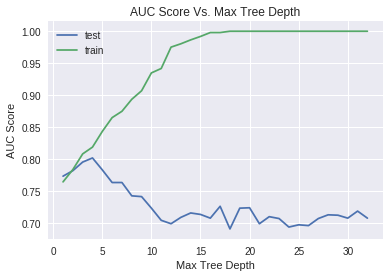

In [6]:

# Identify the optimal tree depth for given data
import numpy as np
arr= np.arange(1,33)
roc_test = []
roc_train = []
for i in arr:
    clf= DecisionTreeClassifier(criterion='entropy', max_depth= i)
    model_tree= clf.fit(X_train,y_train)
    y_hat_test= model_tree.predict(X_test)
    y_hat_train=model_tree.predict(X_train)
    roc_test_score= roc_auc_score(y_test, y_hat_test)
    roc_test.append(roc_test_score)
    roc_train_score= roc_auc_score(y_train,y_hat_train)
    roc_train.append(roc_train_score)

plt.plot(arr,roc_test, label = 'test')
plt.plot(arr,roc_train, label= 'train')
plt.ylabel('AUC Score')
plt.xlabel('Max Tree Depth')
plt.title('AUC Score Vs. Max Tree Depth')
plt.legend()
plt.show();

# Your code here 

# You observations here 
For our train set the max depth increase our AUC score up until the depth of 15 branches, but flattens out after than. Our AUC for our test set reaches a max at depth roughly between 3 and 4.

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree. 
- Create an array for for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

In [74]:
# Identify the optimal min-samples-split for given data
import numpy as np
arr= np.linspace(.1,1.,10, endpoint= True)
roc_test = []
roc_train = []
for i in arr:
    clf= DecisionTreeClassifier(min_samples_split= i)
    model_tree= clf.fit(X_train,y_train)
    y_hat_test= model_tree.predict(X_test)
    y_hat_train=model_tree.predict(X_train)
    roc_test_score= roc_auc_score(y_test, y_hat_test)
    roc_test.append(roc_test_score)
    roc_train_score= roc_auc_score(y_train,y_hat_train)
    roc_train.append(roc_train_score)

plt.plot(arr,roc_test, label = 'test')
plt.plot(arr,roc_train, label= 'train')
plt.ylabel('AUC Score')
plt.xlabel('Min Samples Split')
plt.title('AUC Score Vs. Min Samples Split')
plt.legend()
plt.show();
# Your code here 

# Your code here 

# Your observations
For both train and test set as "min splits" increases, AUC bottoms out and then increases to a max at min samples split reaches .4



## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree. 
- Create an array for for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

In [75]:
# Calculate the optimal value for minimum sample leafs
# Identify the optimal min-samples-split for given data
import numpy as np
arr= np.linspace(.1,.5,5, endpoint= True)
roc_test = []
roc_train = []
for i in arr:
    clf= DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= i)
    model_tree= clf.fit(X_train,y_train)
    y_hat_test= model_tree.predict(X_test)
    y_hat_train=model_tree.predict(X_train)
    roc_test_score= roc_auc_score(y_test, y_hat_test)
    roc_test.append(roc_test_score)
    roc_train_score= roc_auc_score(y_train,y_hat_train)
    roc_train.append(roc_train_score)

plt.plot(arr,roc_test, label = 'test')
plt.plot(arr,roc_train, label= 'train')
plt.ylabel('AUC Score')
plt.xlabel('Min Samples Leaf')
plt.title('AUC Score Vs. Min Samples Leaf')
plt.legend()
plt.show();
# Your code here 
# Your code here 

# Your observations here 
Having the lowest minimum sample leaf will not necesarily retrieve the best AUC Score

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree. 
- Create an array for for `max_features` values ranging from 1 - 12 (1 features vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

In [78]:
# Find the best value for optimal maximum feature size

# Calculate the optimal value for minimum sample leafs
# Identify the optimal min-samples-split for given data
import numpy as np
arr= np.arange(1,12)
roc_test = []
roc_train = []
for i in arr:
    clf= DecisionTreeClassifier(criterion= 'entropy', max_features=i)
    model_tree= clf.fit(X_train,y_train)
    y_hat_test= model_tree.predict(X_test)
    y_hat_train=model_tree.predict(X_train)
    roc_test_score= roc_auc_score(y_test, y_hat_test)
    roc_test.append(roc_test_score)
    roc_train_score= roc_auc_score(y_train,y_hat_train)
    roc_train.append(roc_train_score)

plt.plot(arr,roc_test, label = 'test')
plt.plot(arr,roc_train, label= 'train')
plt.ylabel('AUC Score')
plt.xlabel('Max Features')
plt.title('AUC Score Vs. Max Features')
plt.legend()
plt.show();
# Your code here 
# Your code here 
# Your code here 

In [77]:
# Your observations here 



## Re-train the classifier with chosen values

So now we shall use the best values from each training phase above and feed it back to our classifier and see if have any improvement in predictive performance. 

- Train the classifier with optimal values identified 
- compare the AUC with vanilla DT AUC 
- Interpret the results of comparison

In [192]:
# train a classifier with optimal values identified above
# Find the best value for optimal maximum feature size

# Calculate the optimal value for minimum sample leafs
# Identify the optimal min-samples-split for given data
import numpy as np
clf= DecisionTreeClassifier(criterion= 'entropy', max_features=i)
model_tree= clf.fit(X_train,y_train)
y_hat_test= model_tree.predict(X_test)
y_hat_train=model_tree.predict(X_train)
roc_auc_score(y_test, y_hat_test)
roc_auc_score(y_train,y_hat_train)

# Your code here 

0.7348379629629629

In [ ]:
# You observations here 


In the next section, we shall talk about hyper-parameter tuning using a technique called "grid-search" to make this process even more granular and decisive. 


## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid over fitting and increasing the generalization capabilities of the classifier. For the Titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 